<a href="https://colab.research.google.com/github/spctr01/Customer-propensity-to-churn-Prediction/blob/master/Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('churn_prediction.csv', error_bad_lines=False)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [ ]:
data.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


# **Data Exploration**

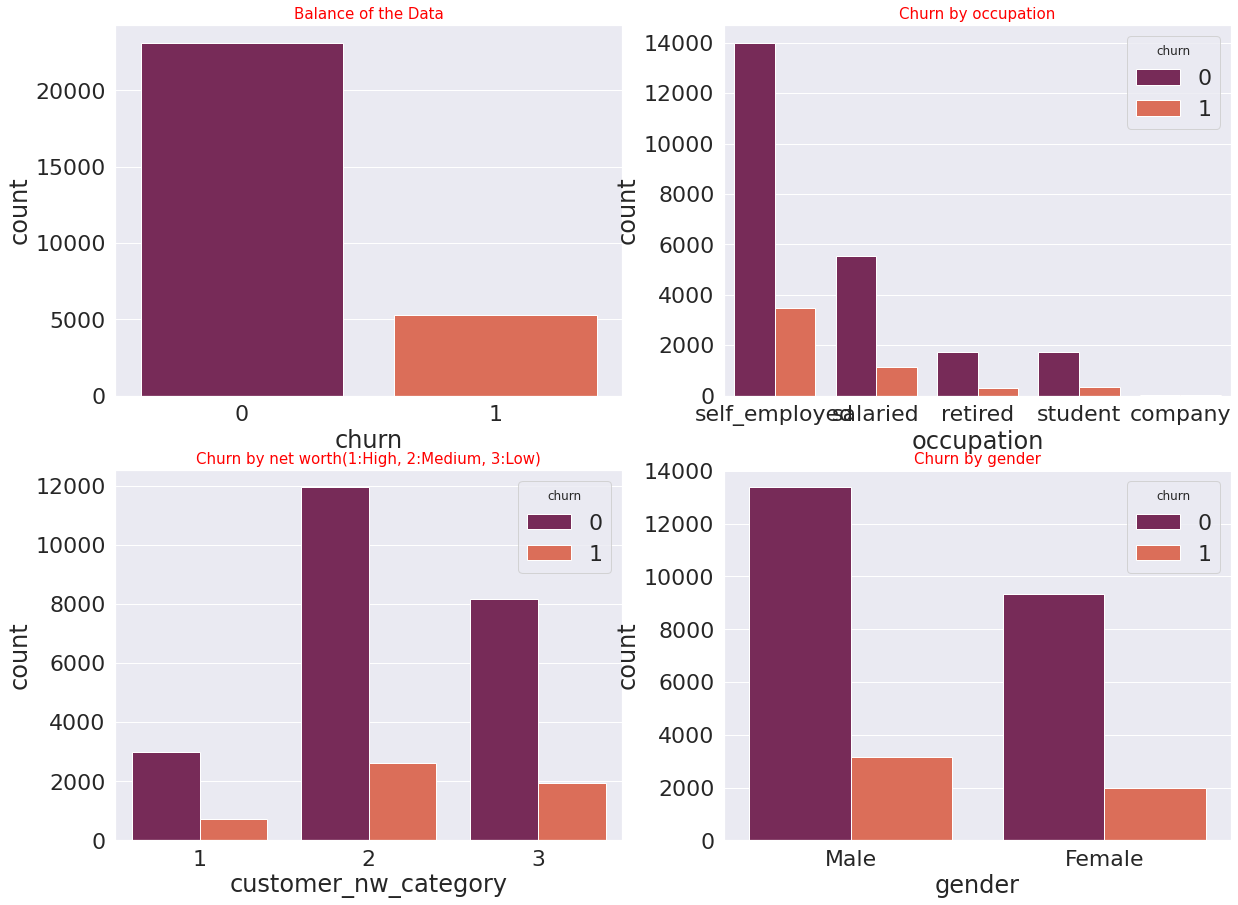

In [ ]:
fig , ax = plt.subplots(2,2, figsize = (20,15))

ax[0,0].set_title('Balance of the Data', color='red', fontsize=15)
sns.countplot('churn', data=data,  palette='rocket', ax=ax[0,0])

ax[0,1].set_title('Churn by occupation', color='red', fontsize=15)
sns.countplot('occupation', data=data, hue='churn', palette='rocket', ax=ax[0,1])

ax[1,0].set_title('Churn by net worth(1:High, 2:Medium, 3:Low)', color='red', fontsize=15)
sns.countplot('customer_nw_category', data=data, hue='churn', palette='rocket', ax=ax[1,0])

ax[1,1].set_title('Churn by gender', color='red', fontsize=15)
sns.countplot('gender', data=data, hue='churn', palette='rocket', ax=ax[1,1])

In [ ]:
print(data.shape)
# we can see that data is inbalanced  from  1st subplot int the above graph
#(resampling  the data can be done & choosing various evalution matrix as Accuracy is not right in this case)


(28382, 21)


In [ ]:
data.dtypes


customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [ ]:
#null values in the dataset
data.isnull().sum()


customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# **Imputing missing values**

In [ ]:
#filling gender, occupation, days_since_last_transaction, city with mode & dependents with mean
data['gender'].fillna(data['gender'].mode()[0], inplace= True)
data['city'].fillna(data['city'].mode()[0], inplace= True)
data['occupation'].fillna(data['occupation'].mode()[0], inplace= True)
data['dependents'].fillna(data['dependents'].mean(), inplace= True)
data['days_since_last_transaction'].fillna(data['days_since_last_transaction'].mode()[0], inplace= True)


# **Split the Data**

In [ ]:
#split data to tarin and test tests
from sklearn.model_selection import train_test_split


x =data.drop('churn', axis = 1)
y =data['churn']
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size = 0.2)

y_test.value_counts()


0    4639
1    1038
Name: churn, dtype: int64

# **Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

enc = OneHotEncoder()
cat_features = ['gender', 'occupation']
transform = ColumnTransformer([('1hot',
                                enc,
                                cat_features)],
                              remainder = 'passthrough')
x_train_transformed_data = transform.fit_transform(x_train)
x_test_transformed_data = transform.fit_transform(x_test)


#it is converted to numpy array so convert it to pandas dataframe 
train_data = pd.DataFrame(x_train_transformed_data)
test_data = pd.DataFrame(x_test_transformed_data)

train_data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18410.0,4136.0,27.0,0.000000,656.0,2.0,1383.0,0.0,18090.02,18090.02,18090.02,17975.41,0.40,0.40,0.40,0.40,18090.02,18090.02
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,343.0,475.0,29.0,0.347236,334.0,2.0,675.0,54.0,411.42,5431.33,4133.69,5558.93,0.14,2742.15,4907.29,5122.71,2606.04,5904.87
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,28162.0,5707.0,47.0,0.000000,318.0,3.0,1306.0,0.0,1784.17,1784.17,1784.17,1772.85,0.26,0.26,0.26,0.26,1784.17,1784.17
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,29146.0,2370.0,58.0,3.000000,146.0,3.0,1604.0,3.0,1587.10,1573.63,1574.25,1496.52,13.90,0.43,0.43,0.43,1575.49,1573.63
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6494.0,874.0,23.0,0.000000,1096.0,3.0,1375.0,42.0,8101.96,8116.41,7376.59,6680.06,0.06,1428.63,14.51,0.06,8108.94,7333.00


# **Evaluating**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_data, y_train)
model.score(test_data, y_test)

0.8222652809582526

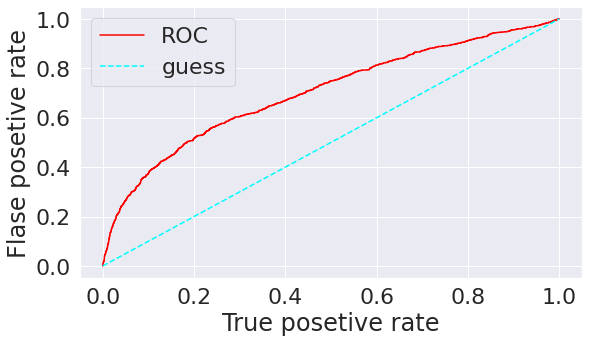

Text(20.5, 0.5, 'Predicted')

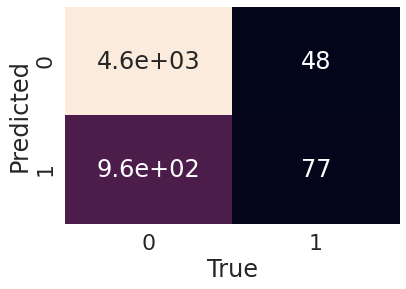

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve

pred = model.predict_proba(test_data)
posetive = pred[:,1]
fpr, tpr, thresholds = roc_curve(y_test, posetive)


pred = model.predict(test_data)
conf_mat = confusion_matrix(y_test, pred)
conf_mat


#create a function to plot a curve
def plot_roc(fpr, tpr):

  plt.figure(figsize=(9,5) )
  plt.plot(fpr, tpr, color= 'red', label='ROC')
  plt.plot([0,1], [0,1], color = 'cyan', linestyle = '--', label= 'guess')
  
  plt.xlabel('True posetive rate' )
  plt.ylabel('Flase posetive rate')


  plt.legend()
  plt.show()

plot_roc(fpr, tpr)



#visualise confusion matrix with seaborn heat map
import seaborn as sns
sns.set(font_scale = 2)
sns.heatmap(conf_mat, annot = True, cbar= False)
plt.xlabel('True')
plt.ylabel('Predicted')

